In [1]:
import pandas as pd 
import numpy as np 
import datetime

In [9]:
df = pd.read_excel("frequency of doing business.xlsx")
df

,customer_id,booking_date
0,1085,2022-02-23
1,1714,2022-02-06
2,1980,2022-03-22
3,1793,2022-04-02
4,1692,2022-12-07
...,...,...
1089,1556,2022-11-11
1090,1282,2022-08-09
1091,1548,2022-09-13
1092,1971,2022-02-28


In [7]:
# Convert the booking date column to a datetime object
df['booking_date'] = pd.to_datetime(df['booking_date'])

In [10]:
# Group the data by customer and time period, and count the number of bookings for each group
df['time_period'] = df['booking_date'].dt.to_period('M')  # group by month
customer_freq = df.groupby(['customer_id', 'time_period'])['booking_date'].count().reset_index()

In [14]:
# Pivot the data to create a table of bookings per customer per time period
bookings = customer_freq.pivot(index='customer_id', columns='time_period', values='booking_date').fillna(0)

In [15]:
# Calculate the average number of bookings per customer over all time periods
avg_bookings = bookings.mean(axis=1).reset_index(name='avg_bookings')

In [18]:
# Sort the customers based on their average booking frequency, and identify the top customers who are doing the most frequent business
top_customers = avg_bookings.sort_values('avg_bookings', ascending=False)[:50]

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1244: UserWarning: Attempting to set identical left == right == 624.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


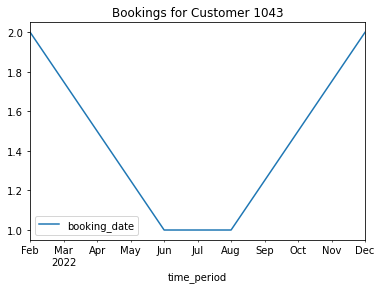

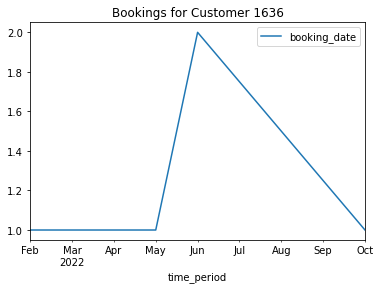

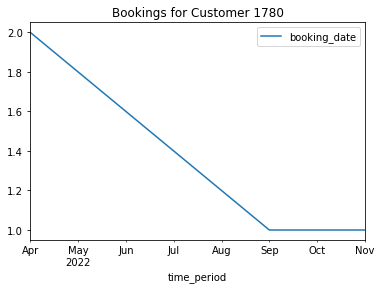

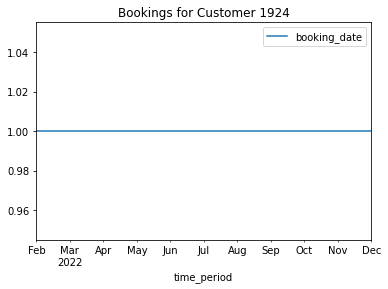

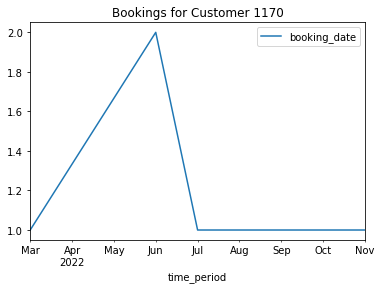

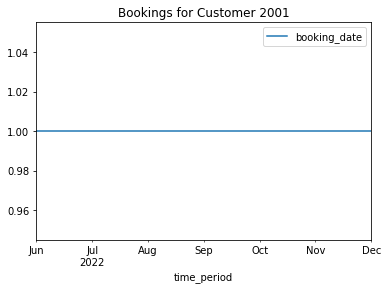

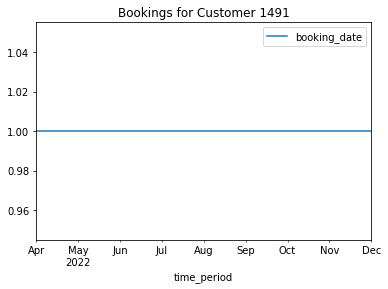

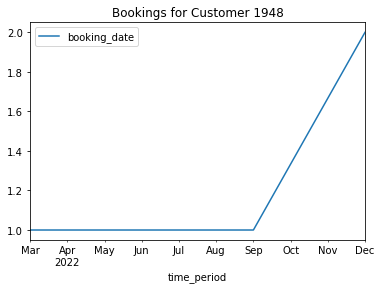

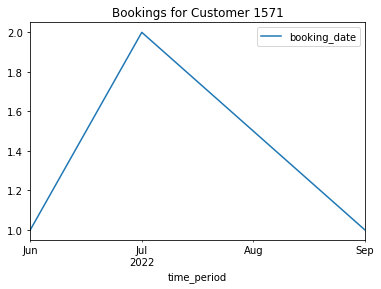

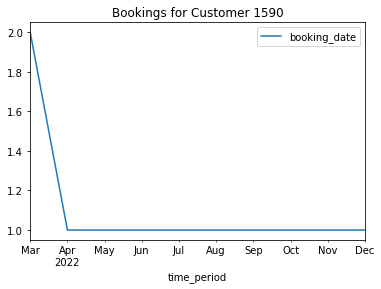

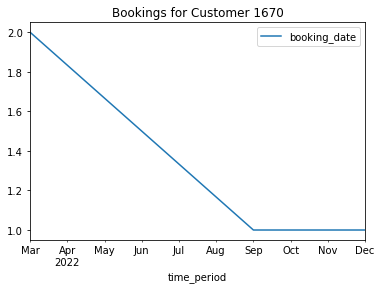

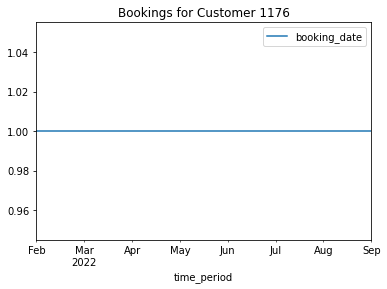

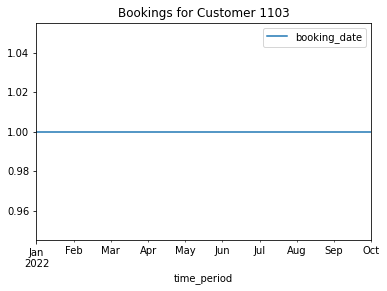

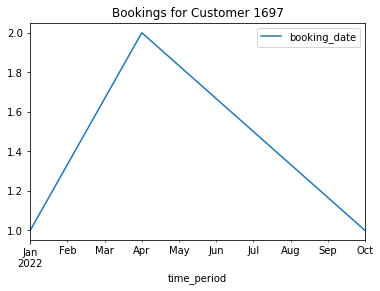

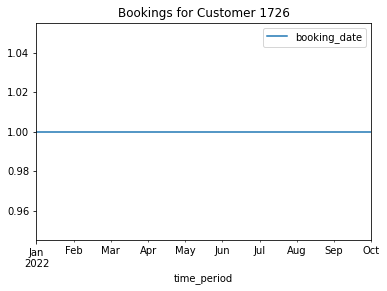

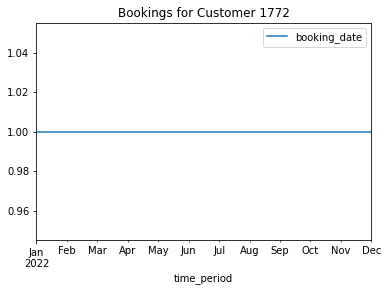

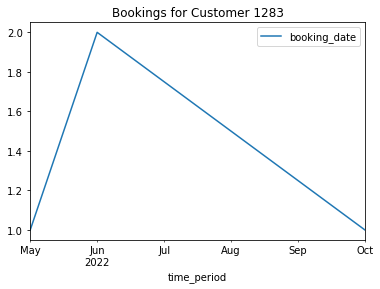

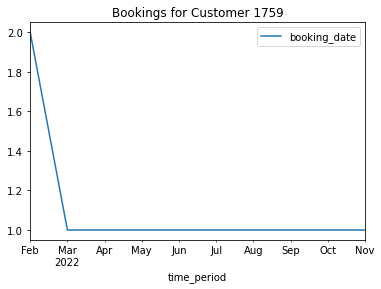

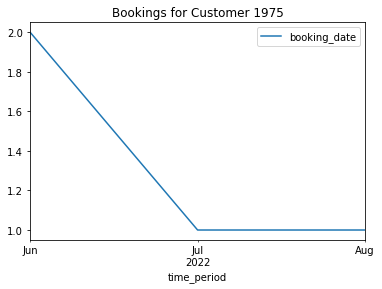

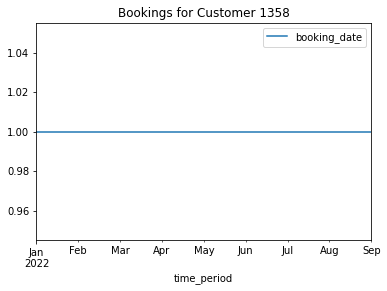

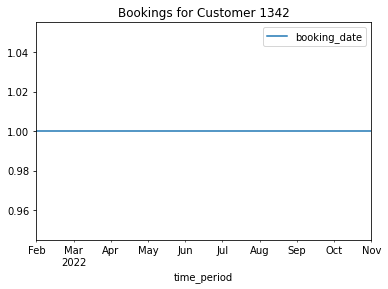

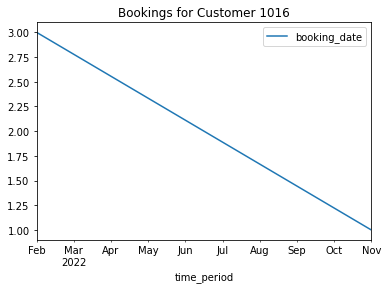

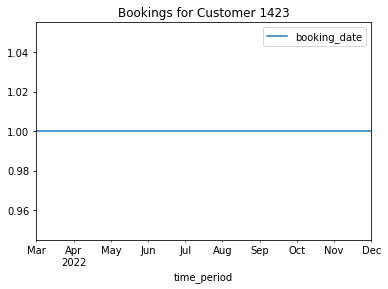

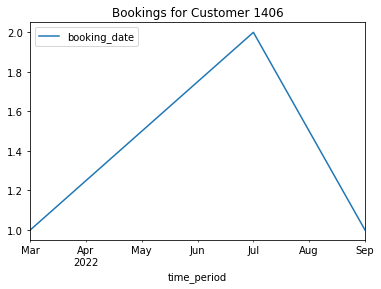

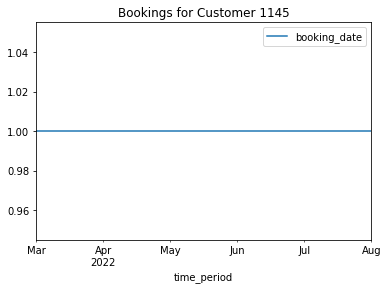

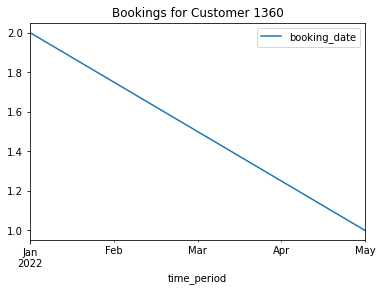

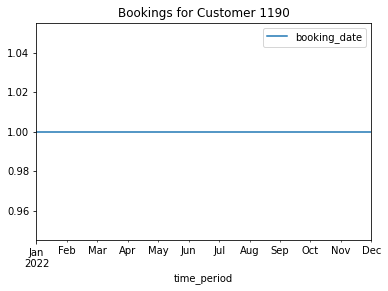

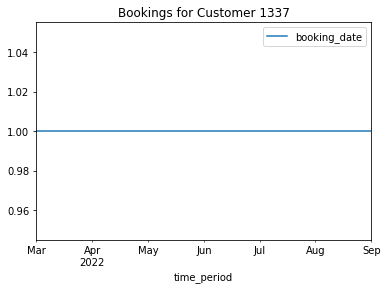

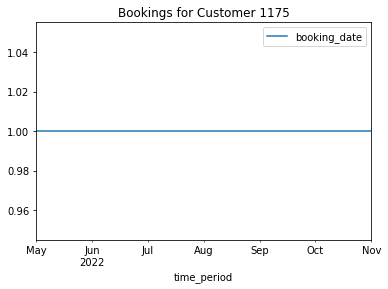

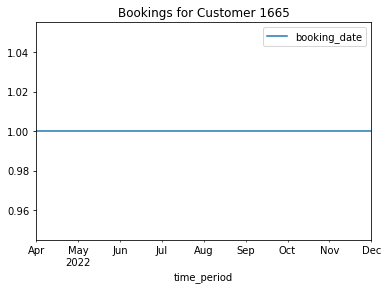

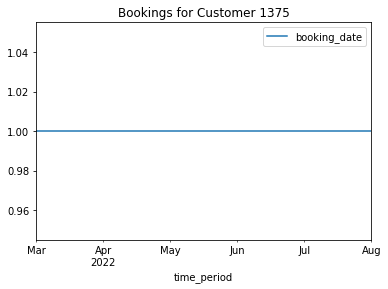

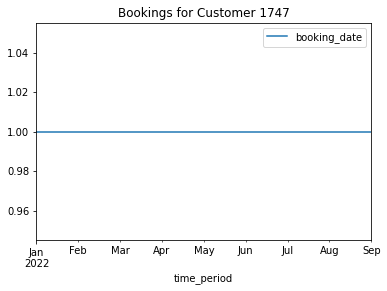

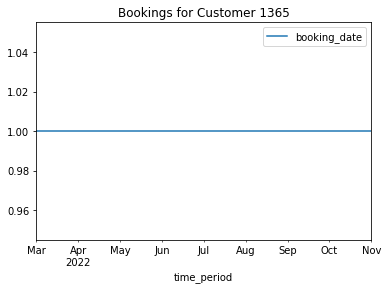

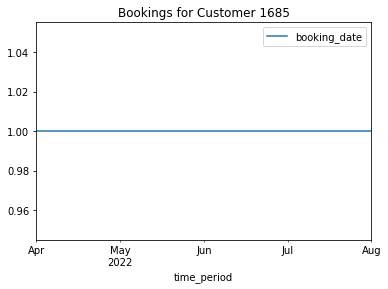

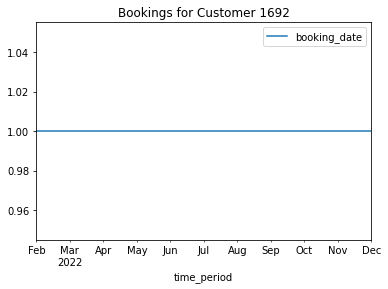

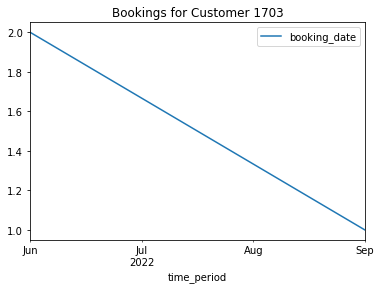

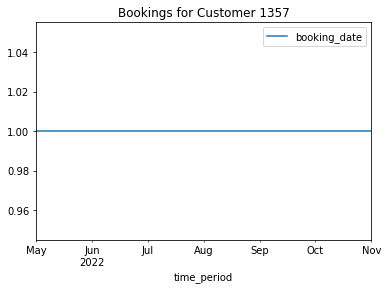

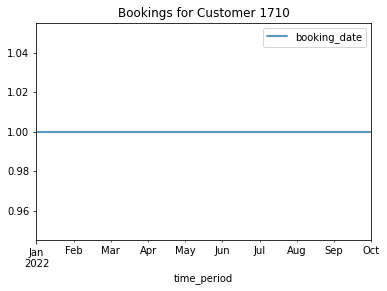

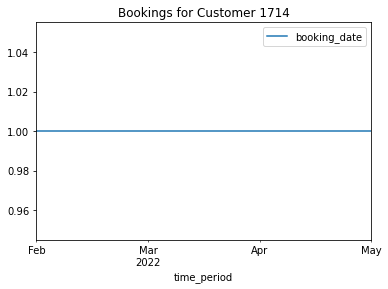

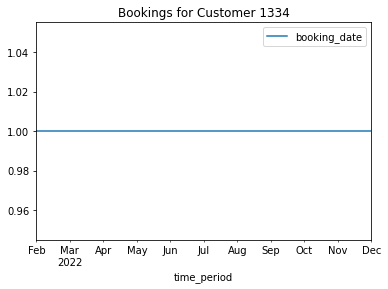

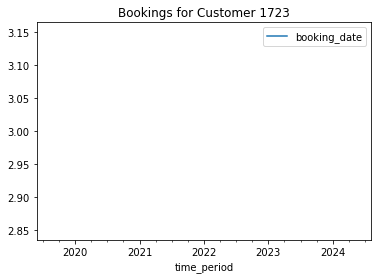

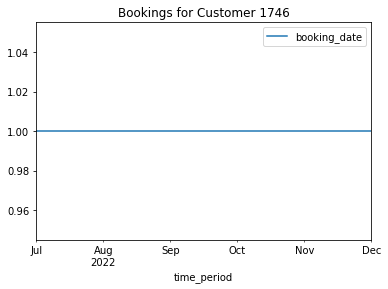

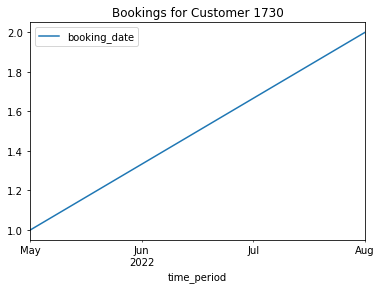

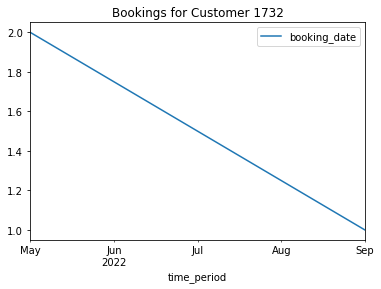

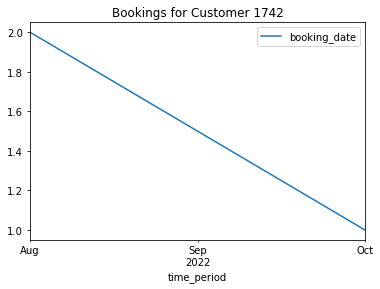

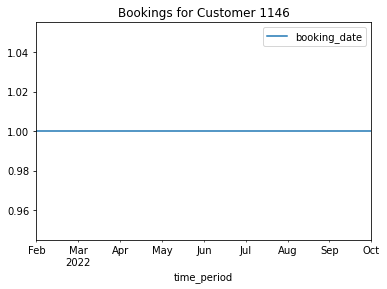

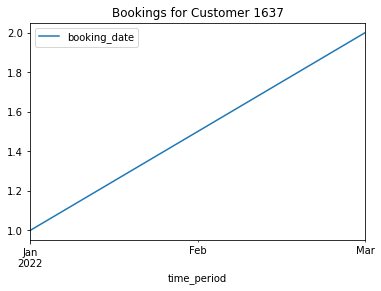

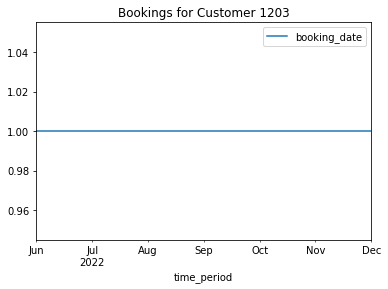

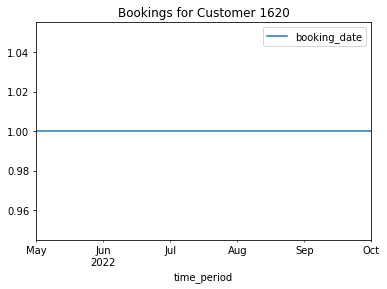

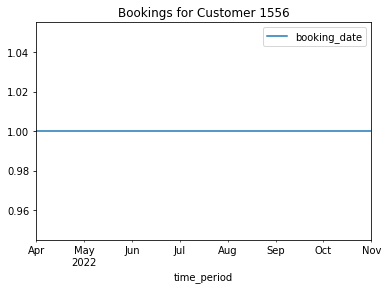

In [19]:
# Plot the booking frequency over time for the top frequent customers
for customer_id in top_customers['customer_id']:
    customer_data = customer_freq[customer_freq['customer_id'] == customer_id]
    customer_data.plot(x='time_period', y='booking_date', kind='line', title=f'Bookings for Customer {customer_id}')